# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# Read Data

In [2]:
# read data
dataFileName = ('../../_data/_processed/' + 'processed_for_viz.csv')
df = pd.read_csv(dataFileName)
print(df.columns)

Index(['name', 'rating', 'genre', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross revenue', 'company', 'runtime',
       'release month', 'release day', 'release year', 'release month num',
       'release date', 'release quarter', 'release day of week'],
      dtype='object')


# Basic Descriptive Statistics

In [3]:
df.describe()

,score,votes,budget,gross revenue,runtime,release day,release year,release month num,release quarter
count,7357.000000,7.357000e+03,7.357000e+03,7.357000e+03,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000
mean,6.395623,9.135618e+04,3.086005e+07,7.952152e+07,107.455485,16.061166,2000.905124,6.591817,2.534185
std,0.962316,1.658002e+05,3.750481e+07,1.666726e+08,18.549042,8.547953,11.036076,3.435359,1.123955
min,1.900000,1.050000e+02,-3.745563e+07,3.090000e+02,63.000000,1.000000,1980.000000,1.000000,1.000000
25%,5.800000,1.000000e+04,9.112710e+06,4.814619e+06,95.000000,9.000000,1992.000000,4.000000,2.000000
50%,6.500000,3.500000e+04,2.000000e+07,2.090186e+07,104.000000,16.000000,2001.000000,7.000000,3.000000
75%,7.100000,9.700000e+04,3.591635e+07,7.714239e+07,116.000000,23.000000,2010.000000,10.000000,4.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,31.000000,2020.000000,12.000000,4.000000


# Train a Linear Regression Model

In [4]:
# define model variables
predictors = ['rating', 'genre', 'runtime', 'release quarter'] #'director', 'writter', 'star', 'company' are other options but they lead to
outcome = 'score'
normalize = False # normalize=true does not seem to impact the performance on this dataset
testSize = 0.4

In [5]:
# partition data
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=testSize, random_state=1)

In [6]:
# fitting a regression model
lm = LinearRegression(normalize=normalize) 
lm.fit(train_X, train_y)

# print coefficients
print('Table 6.3')
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures (training data)
regressionSummary(train_y, lm.predict(train_X))

Table 6.3
intercept  4.109662996704563
           Predictor  coefficient
0            runtime     0.017960
1    release quarter     0.011949
2       rating_NC-17    -0.015135
3   rating_Not Rated     0.311644
4          rating_PG    -0.106298
5       rating_PG-13    -0.033722
6           rating_R     0.163869
7       rating_TV-MA     0.274410
8     rating_Unrated     0.302812
9           rating_X     0.823563
10   genre_Adventure     0.250532
11   genre_Animation     1.045688
12   genre_Biography     0.717254
13      genre_Comedy     0.178275
14       genre_Crime     0.415871
15       genre_Drama     0.415869
16      genre_Family     0.568617
17     genre_Fantasy     0.112400
18      genre_Horror    -0.197174
19     genre_Mystery     0.385336
20     genre_Romance     0.446748
21      genre_Sci-Fi     0.291884
22    genre_Thriller     0.264952
23     genre_Western    -0.288788

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) :

# Make Predictions on Validation Data

In [7]:
# Use predict() to make predictions on a new set

lm_pred = lm.predict(valid_X)
result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y, 'Residual': valid_y - lm_pred})

print('Table 6.4')
print(result.head(20))


Table 6.4
      Predicted  Actual  Residual
2164   5.962058     6.2  0.237942
1233   6.656093     7.8  1.143907
2495   6.169930     5.4 -0.769930
5534   5.851822     6.6  0.748178
2702   6.515283     7.1  0.584717
5668   6.676922     6.1 -0.576922
4995   6.350778     6.2 -0.150778
634    6.335686     5.4 -0.935686
1165   6.099413     6.5  0.400587
6344   6.271643     6.6  0.328357
3059   7.107954     7.7  0.592046
4146   6.391385     6.4  0.008615
1373   7.077938     8.8  1.722062
5996   6.175868     5.4 -0.775868
2565   6.272966     7.3  1.027034
4579   6.374714     6.1 -0.274714
6052   6.634956     7.7  1.065044
6204   6.002247     5.8 -0.202247
7023   6.266086     7.1  0.833914
2545   6.169930     5.0 -1.169930


# Evaluate the Performance

In [8]:
# print performance measures
regressionSummary(valid_y, lm_pred)


Regression statistics

                      Mean Error (ME) : -0.0017
       Root Mean Squared Error (RMSE) : 0.8461
            Mean Absolute Error (MAE) : 0.6516
          Mean Percentage Error (MPE) : -2.2903
Mean Absolute Percentage Error (MAPE) : 11.2133


Figure 6.1
0.764525993883792


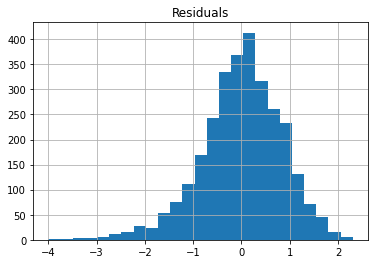

In [9]:
# plotting histogram of validation errors
bins = 25
residual_bound = .95

lm_pred = lm.predict(valid_X)
all_residuals = valid_y - lm_pred

# Determine the percentage of datapoints with a residual in [-.95, .95] = approx. 75%
print('Figure 6.1')
print(len(all_residuals[(all_residuals > -residual_bound) & (all_residuals < residual_bound)]) / len(all_residuals))

pd.DataFrame({'Residuals': all_residuals}).hist(bins=bins)
plt.show()

# Variable Selection

In [10]:
# backward elimination (stepwise)

def train_model(variables):
    model = LinearRegression(normalize=normalize) # normalize=true does not seem to impact the performance on this dataset
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model_be, best_variables_be = backward_elimination(allVariables, train_model, score_model, verbose=True)

print('Table 6.6')
print(best_variables_be)

regressionSummary(valid_y, best_model_be.predict(valid_X[best_variables_be]))

Variables: runtime, release quarter, rating_NC-17, rating_Not Rated, rating_PG, rating_PG-13, rating_R, rating_TV-MA, rating_Unrated, rating_X, genre_Adventure, genre_Animation, genre_Biography, genre_Comedy, genre_Crime, genre_Drama, genre_Family, genre_Fantasy, genre_Horror, genre_Mystery, genre_Romance, genre_Sci-Fi, genre_Thriller, genre_Western
Start: score=11005.40
Step: score=11003.41, remove rating_NC-17
Step: score=11001.52, remove rating_PG-13
Step: score=10999.72, remove genre_Thriller
Step: score=10998.07, remove genre_Western
Step: score=10996.43, remove genre_Sci-Fi
Step: score=10994.87, remove genre_Fantasy
Step: score=10993.65, remove rating_TV-MA
Step: score=10992.69, remove rating_X
Step: score=10991.83, remove release quarter
Step: score=10991.62, remove genre_Mystery
Step: score=10991.56, remove genre_Romance
Step: score=10991.56, remove None
Table 6.6
['runtime', 'rating_Not Rated', 'rating_PG', 'rating_R', 'rating_Unrated', 'genre_Adventure', 'genre_Animation', 'g

In [11]:
# forward selection
print('Table 6.7')

# the initial model is the constant model - this requires special handling in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression(normalize=normalize) # normalize=true does not seem to impact the performance on this dataset
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model_fs, best_variables_fs = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables_fs)

regressionSummary(valid_y, best_model_fs.predict(valid_X[best_variables_fs]))

Table 6.7
Variables: runtime, release quarter, rating_NC-17, rating_Not Rated, rating_PG, rating_PG-13, rating_R, rating_TV-MA, rating_Unrated, rating_X, genre_Adventure, genre_Animation, genre_Biography, genre_Comedy, genre_Crime, genre_Drama, genre_Family, genre_Fantasy, genre_Horror, genre_Mystery, genre_Romance, genre_Sci-Fi, genre_Thriller, genre_Western
Start: score=12171.39, constant
Step: score=11453.20, add runtime
Step: score=11314.30, add genre_Animation
Step: score=11237.60, add genre_Biography
Step: score=11155.35, add genre_Drama
Step: score=11090.29, add genre_Crime
Step: score=11061.63, add rating_R
Step: score=11041.08, add rating_Not Rated
Step: score=11019.37, add genre_Horror
Step: score=11009.28, add genre_Comedy
Step: score=10997.52, add genre_Adventure
Step: score=10994.99, add rating_Unrated
Step: score=10993.34, add genre_Family
Step: score=10991.56, add rating_PG
Step: score=10991.56, add None
['runtime', 'genre_Animation', 'genre_Biography', 'genre_Drama', 'g

In [12]:
# stepwise regression
print('Table 6.8')

best_model_stepwise, best_variables_stepwise = stepwise_selection(train_X.columns, train_model, score_model, verbose=True) 
print(best_variables_stepwise)
regressionSummary(valid_y, best_model_stepwise.predict(valid_X[best_variables_stepwise]))

Table 6.8
Variables: runtime, release quarter, rating_NC-17, rating_Not Rated, rating_PG, rating_PG-13, rating_R, rating_TV-MA, rating_Unrated, rating_X, genre_Adventure, genre_Animation, genre_Biography, genre_Comedy, genre_Crime, genre_Drama, genre_Family, genre_Fantasy, genre_Horror, genre_Mystery, genre_Romance, genre_Sci-Fi, genre_Thriller, genre_Western
Start: score=12171.39, constant
Step: score=11453.20, add runtime
Step: score=11314.30, add genre_Animation
Step: score=11237.60, add genre_Biography
Step: score=11155.35, add genre_Drama
Step: score=11090.29, add genre_Crime
Step: score=11061.63, add rating_R
Step: score=11041.08, add rating_Not Rated
Step: score=11019.37, add genre_Horror
Step: score=11009.28, add genre_Comedy
Step: score=10997.52, add genre_Adventure
Step: score=10994.99, add rating_Unrated
Step: score=10993.34, add genre_Family
Step: score=10991.56, add rating_PG
Step: score=10991.56, unchanged None
['runtime', 'genre_Animation', 'genre_Biography', 'genre_Dram

# Use the prediction models

In [13]:
# create a movie (in this data a movie can't have more than one rating nor more than one genre)
newMovie = pd.DataFrame([{
    'runtime': 3*60,
    'release quarter': 4, # 1-4
    'rating_G': 0,
    'rating_NC-17': 0,
    'rating_Not Rated': 0,
    'rating_PG': 0,
    'rating_PG-13': 0,
    'rating_R': 1,
    'rating_TV-MA': 0,
    'rating_Unrated': 0,
    'rating_X': 0,
    'rating_TV-14': 0, 
    'rating_TV-PG': 0, 
    'genre_Adventure': 0,
    'genre_Animation': 0,
    'genre_Biography': 0,
    'genre_Comedy': 0,
    'genre_Crime': 1,
    'genre_Drama': 0,
    'genre_Family': 0,
    'genre_Fantasy': 0,
    'genre_Horror': 0,
    'genre_Mystery': 0,
    'genre_Romance': 0,
    'genre_Sci-Fi': 0,
    'genre_Thriller': 0,
    'genre_Western': 0,
    'genre_Music': 0,
    'genre_Musical': 0,
    'genre_Sport':0
}])

newMovie_thin = newMovie.loc[:, ~(newMovie == 0).any()]

# predict it's score
print(f'What score do we expect from a new movie with the following features?\n{newMovie_thin.T}\n')
print(f'{outcome} per original model (all predictors): {lm.predict(newMovie[X.columns])}')
print(f'{outcome} per backward elimination: {best_model_be.predict(newMovie[best_variables_be])}')
print(f'{outcome} per forward selection: {best_model_fs.predict(newMovie[best_variables_fs])}')
print(f'{outcome} per stepwise: {best_model_stepwise.predict(newMovie[best_variables_stepwise])}')

What score do we expect from a new movie with the following features?
                   0
runtime          180
release quarter    4
rating_R           1
genre_Crime        1

score per original model (all predictors): [7.96994956]
score per backward elimination: [7.96057873]
score per forward selection: [7.96057873]
score per stepwise: [7.96057873]
